The case study we take up in this module pertains to red wines. Dataset that we have contains chemical properties over 4000 red wines. In class we'll take up two important chemical properties which control wine's aroma and potency, namely sulphate and alcohol content. 

We want to check how many groups exist within wines based on these chemicals.Let's begin.

In [1]:
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile)

In [13]:
wine.drop('quality', axis=1, inplace=True)

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.shape

(1599, 12)

In [4]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
wine=wine[["sulphates","alcohol"]]

In [12]:
wine.columns = ['sulphates','alcohol']

In [13]:
wine.head()

,sulphates,alcohol
0,0.56,9.4
1,0.68,9.8
2,0.65,9.8
3,0.58,9.8
4,0.56,9.4


In [14]:
wine.describe()

,sulphates,alcohol
count,1599.000000,1599.000000
mean,0.657598,10.422983
std,0.165552,1.065668
min,0.330000,8.400000
25%,0.550000,9.500000
50%,0.620000,10.200000
75%,0.730000,11.100000
max,1.750000,14.900000


In [8]:
wine.describe(percentiles=[0.01, 0.05, 0.95, 0.99])

,sulphates,alcohol
count,1599.000000,1599.000000
mean,0.658149,10.422983
std,0.169507,1.065668
min,0.330000,8.400000
1%,0.420000,9.000000
5%,0.470000,9.200000
50%,0.620000,10.200000
95%,0.930000,12.500000
99%,1.260400,13.400000
max,2.000000,14.900000


<Axes: xlabel='alcohol', ylabel='sulphates'>

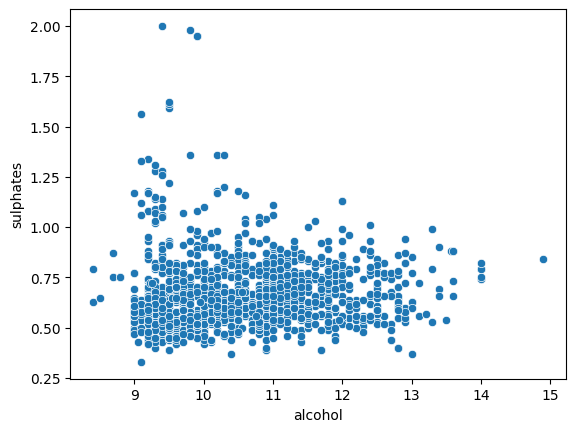

In [9]:
import seaborn as sns
sns.color_palette("rocket")

sns.scatterplot(y = wine['sulphates'], x = wine['alcohol'])

#sns.scatterplot(y = wine['sulphates'],x = list(wine.index))

#sns.scatterplot(y = wine['alcohol'],x = list(wine.index))

<Axes: ylabel='alcohol'>

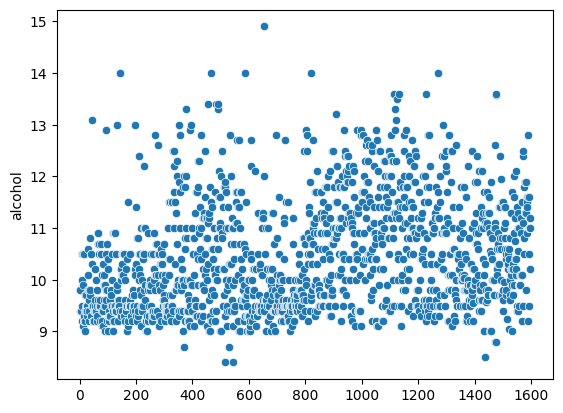

In [15]:
import seaborn as sns
sns.color_palette("rocket")

#sns.scatterplot(y = wine['sulphates'], x = wine['alcohol'])

sns.scatterplot(y = wine['alcohol'],x = list(wine.index))


In [16]:
wine['alcohol'].quantile(0.995)   ### Sulphates can be capped at 1.25  

13.603999999999996

In [10]:
wine['sulphates'].quantile(0.995)    ###Alcohol can be capped at 1.25

1.3619999999999983

In [17]:
##### Outlier Treatment #######

wine.loc[wine['sulphates']>1.75,'sulphates'] = 1.75

#wine.loc[wine['alcohol']>wine['alcohol'].quantile(0.995), 'alcohol'] = wine['alcohol'].quantile(0.99)

In [18]:
##### Outlier Treatment #######

#wine.loc[wine['sulphates']>1.75,'sulphates'] = 1.75

wine.loc[wine['alcohol']>wine['alcohol'].quantile(0.995), 'alcohol'] = wine['alcohol'].quantile(0.99)

In [19]:
### There is scale difference - Perform scaling

You can see that scale of sulphates and alcohol are very different.If we let them be like that, distances will be dominated by alcohol percentages alone due to their scale. We need to scale them

In [21]:
ss = StandardScaler()

ss.fit(wine)

wine_std = pd.DataFrame(ss.transform(wine))

In [22]:
wine_std.describe()

,0,1
count,1.599000e+03,1599.000000
mean,-8.887339e-18,0.000000
std,1.000313e+00,1.000313
min,-1.979443e+00,-1.916128
25%,-6.501407e-01,-0.872392
50%,-2.271808e-01,-0.208196
75%,4.374705e-01,0.645771
max,6.600601e+00,3.017900


In [24]:
 wine_std=pd.DataFrame(scale(wine),columns=list(wine.columns))  ### scale is analogus standard scaling

Output of function scale is matrix, we need to convert it back to frame in order to keep on using it as data frame.

In [25]:
wine_std.describe()

,sulphates,alcohol
count,1.599000e+03,1599.000000
mean,-8.887339e-18,0.000000
std,1.000313e+00,1.000313
min,-1.979443e+00,-1.916128
25%,-6.501407e-01,-0.872392
50%,-2.271808e-01,-0.208196
75%,4.374705e-01,0.645771
max,6.600601e+00,3.017900


<Axes: xlabel='alcohol', ylabel='sulphates'>

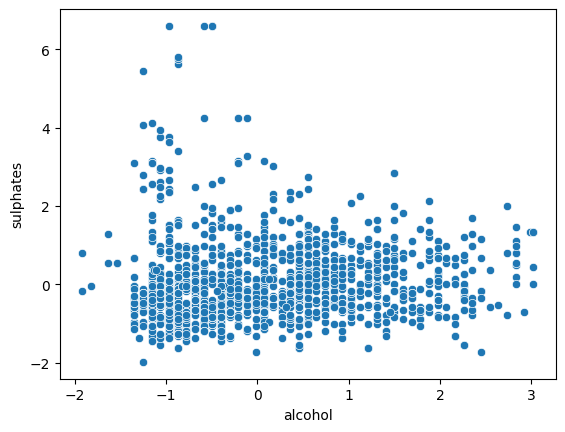

In [26]:
sns.scatterplot(x = wine_std['alcohol'],y = wine_std['sulphates'])

In [27]:
## Fit k means ##

kmeans = KMeans(n_clusters=10)
kmeans.fit(wine_std[['sulphates','alcohol']])

KMeans(n_clusters=10)

In [28]:
### Cluster centers ###

kmeans.cluster_centers_

array([[ 0.70952357,  0.54270336],
       [-0.41255577,  1.95527841],
       [-0.91309937, -0.8002394 ],
       [ 5.38284789, -0.74831106],
       [-0.33555054, -0.06772448],
       [ 0.97435261,  1.85819256],
       [ 2.59673211, -0.5573013 ],
       [ 0.87913268, -0.70521304],
       [-0.20814652, -0.9304929 ],
       [-0.51773877,  0.83761532]])

In [29]:
### Inertia of the fit ####

kmeans.inertia_   ### dispersion value

383.1212420774709

In [30]:
### labels on the training examples ###

kmeans.predict(wine_std[['sulphates','alcohol']])

array([2, 8, 8, ..., 0, 4, 9])

In [33]:
labels = kmeans.labels_ #### prediction on the train set directly

print(labels)
wine_std["cluster_number"]=labels

[2 8 8 ... 0 4 9]


In [34]:
wine_std

,sulphates,alcohol,cluster_number
0,-0.589718,-0.967277,2
1,0.135356,-0.587736,8
2,-0.045912,-0.587736,8
3,-0.468872,-0.587736,8
4,-0.589718,-0.967277,2
...,...,...,...
1594,-0.468872,0.076460,4
1595,0.618739,0.740656,0
1596,0.558316,0.550886,0
1597,0.316625,-0.208196,4


In [35]:
wine_std['cluster_number'].value_counts()

2    304
8    273
4    247
0    201
9    183
7    126
1    103
5     96
6     53
3     13
Name: cluster_number, dtype: int64

In [38]:
print(silhouette_score(wine_std[['sulphates','alcohol']],labels))

print(kmeans.inertia_)

0.3490855237448458
383.1212420774709


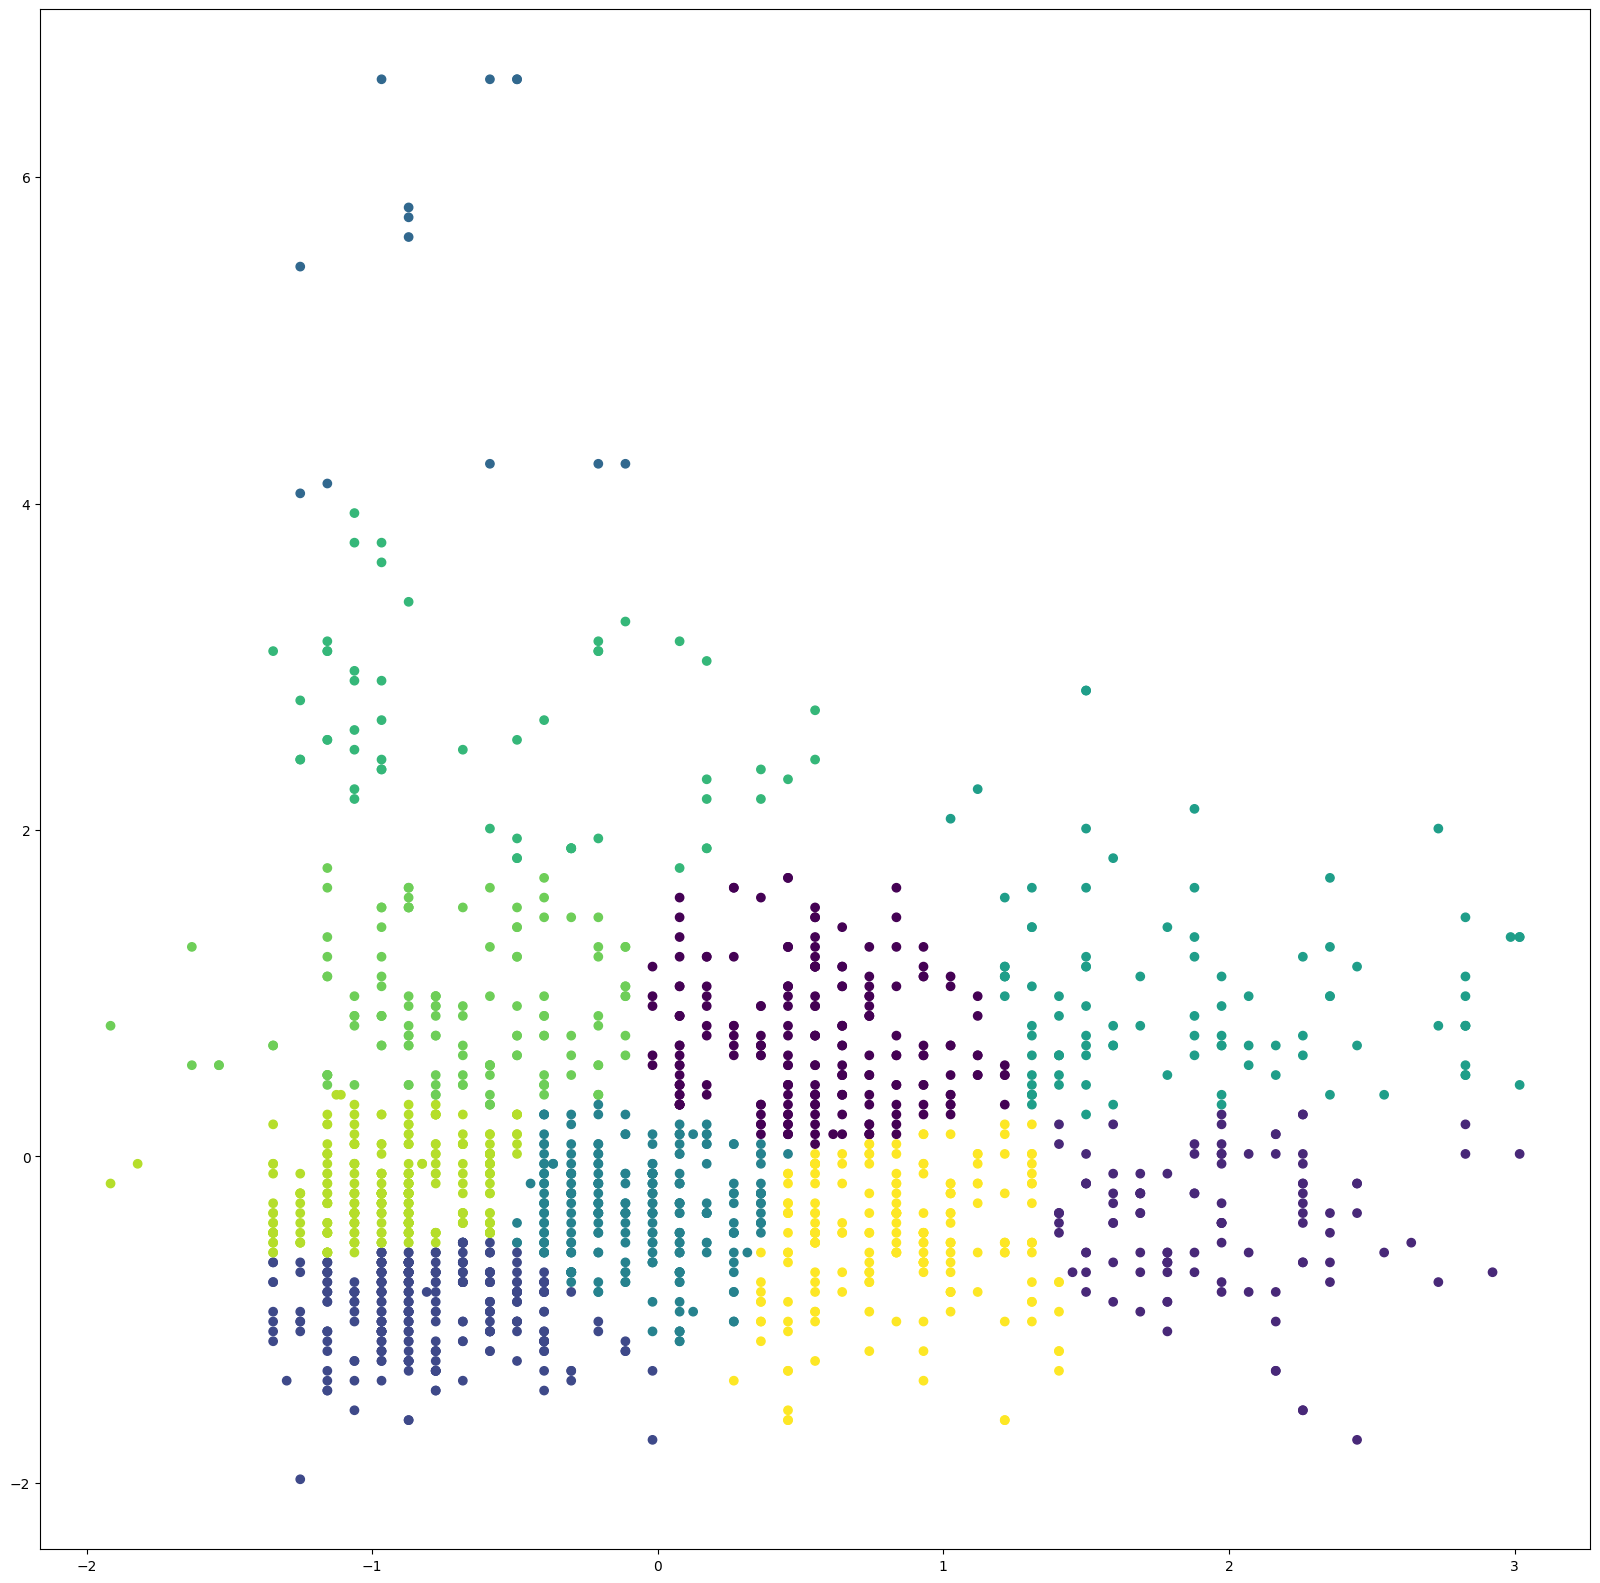

In [40]:
### visualize the clusters ###

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

plt.scatter(wine_std['alcohol'], wine_std['sulphates'], c=wine_std['cluster_number'].astype(float))

<Axes: xlabel='alcohol', ylabel='sulphates'>

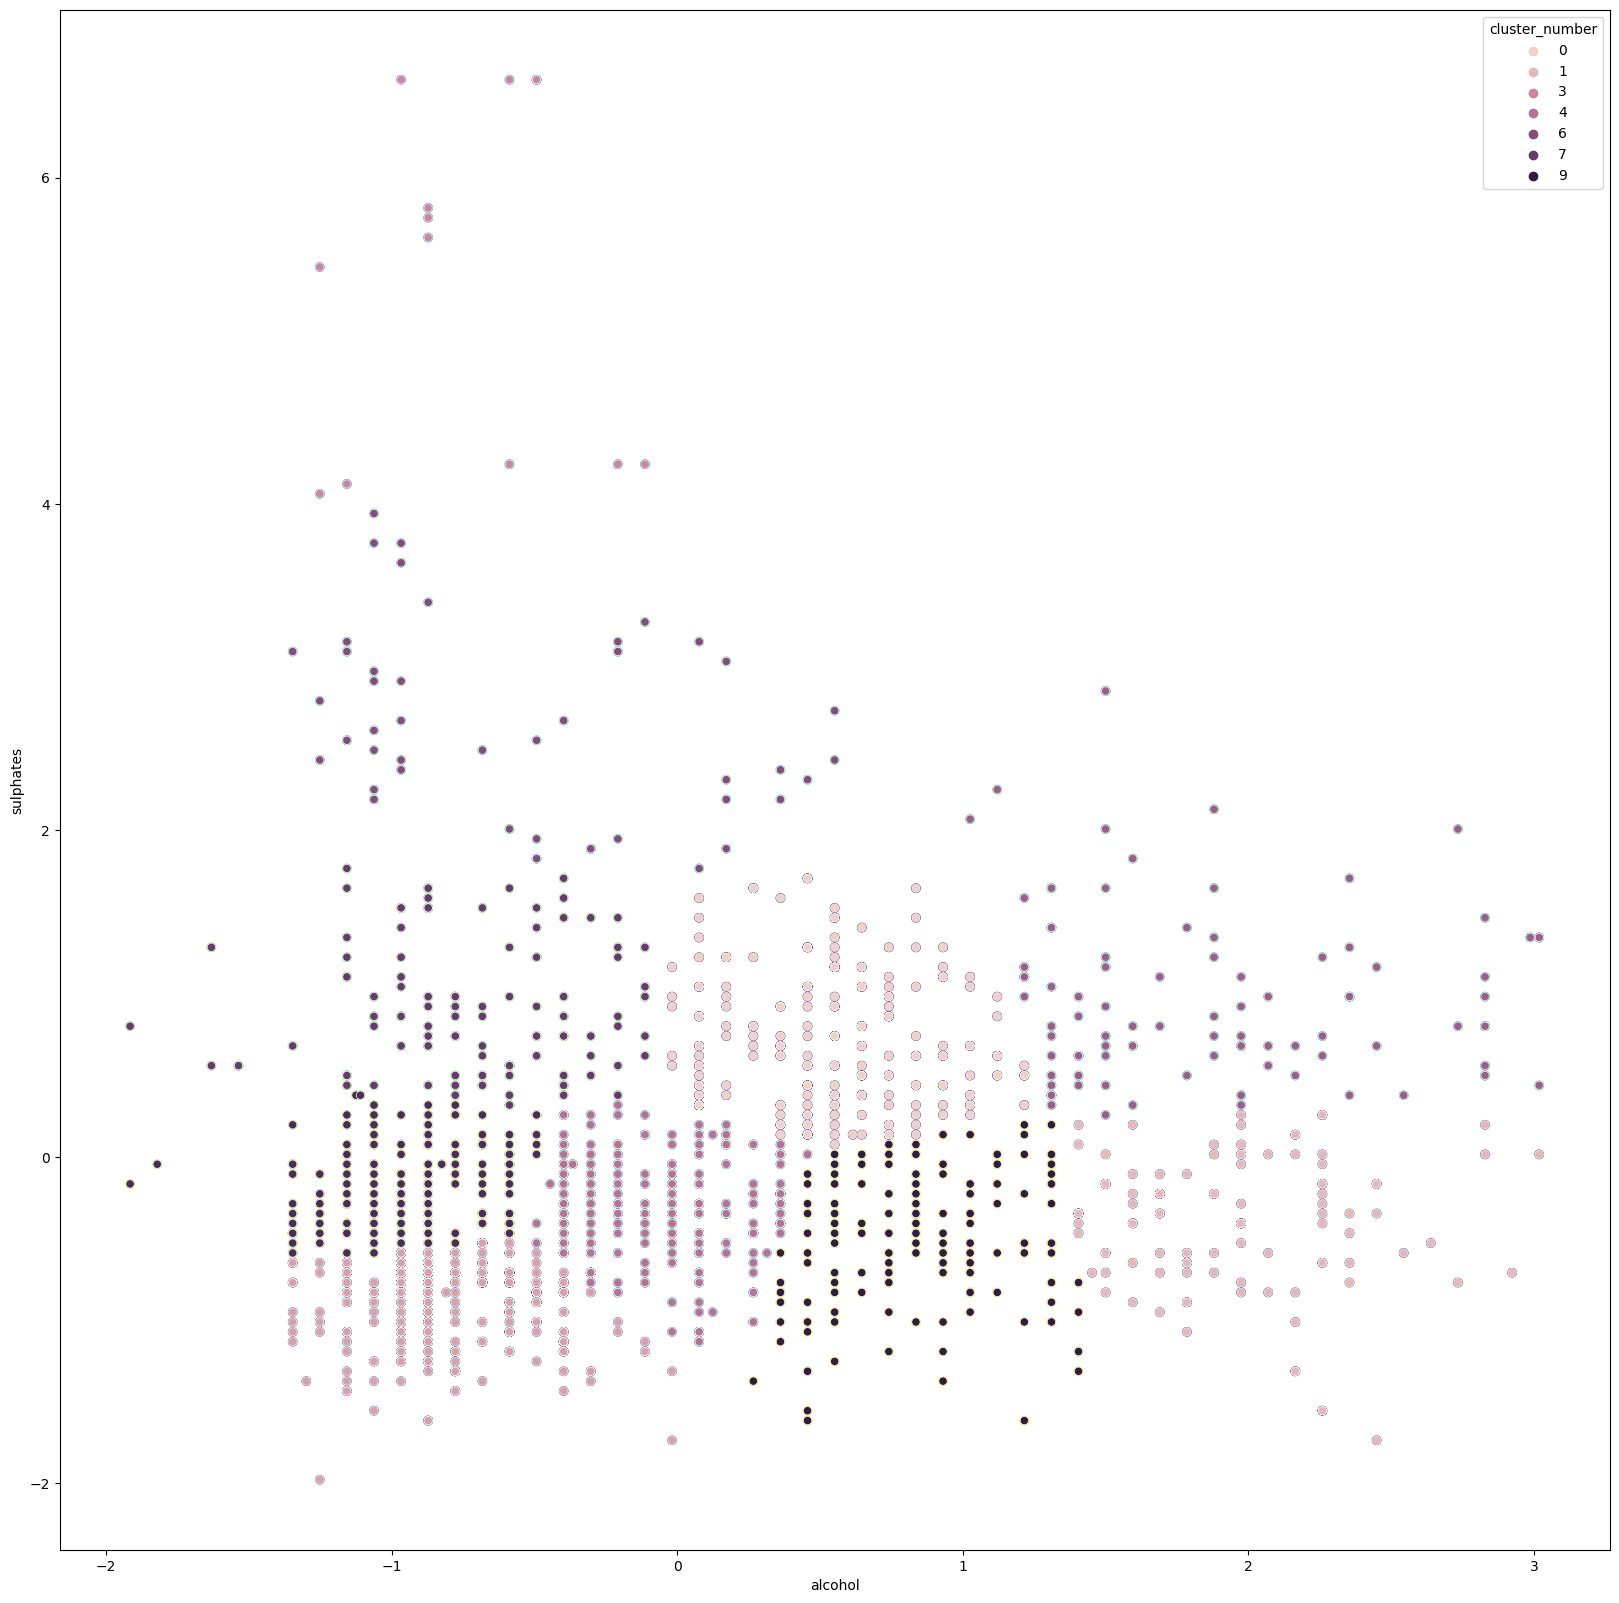

In [41]:
### visualize the clusters ######
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

plt.scatter(wine_std['alcohol'], wine_std['sulphates'], c=wine_std['cluster_number'].astype(float))

sns.scatterplot(x = wine_std['alcohol'], y = wine_std['sulphates'],hue = wine_std['cluster_number'])

In [42]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In the code below , we are trying different values of cluster numbers and for each we are examning silhoutte scores along with their silhoutte plots and visual representation of clusters.

Most of the code below has to do with how the plots are made pretty.

You dont need to do all that every time you do segmentation using K-means. This is more to do with giving you first hand experience as to what silhoutte plots are and how the eventual clusters look like.

You should also notice , how silhoutte scores both average and individual detriorate as we keep on unneccesarily increasing number of clusters. 

In [43]:
for n_clusters in range_n_clusters:
    # Initialize the cluster with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer.fit(wine_std[['sulphates','alcohol']])
    silhouette = silhouette_score(wine_std[['sulphates','alcohol']], clusterer.labels_)
    print("For n_clisters =", n_clusters,
         "The silhouette_score is :", silhouette)

For n_clisters = 2 The silhouette_score is : 0.4222356568749984
For n_clisters = 3 The silhouette_score is : 0.464285342576862
For n_clisters = 4 The silhouette_score is : 0.4297596796937915
For n_clisters = 5 The silhouette_score is : 0.40040311457184996
For n_clisters = 6 The silhouette_score is : 0.39326413757248313
For n_clisters = 7 The silhouette_score is : 0.3775559404775638
For n_clisters = 8 The silhouette_score is : 0.3775036585257837
For n_clisters = 9 The silhouette_score is : 0.3620820481630388
For n_clisters = 10 The silhouette_score is : 0.3518774788612643


In [44]:
wine

,sulphates,alcohol
0,0.56,9.4
1,0.68,9.8
2,0.65,9.8
3,0.58,9.8
4,0.56,9.4
...,...,...
1594,0.58,10.5
1595,0.76,11.2
1596,0.75,11.0
1597,0.71,10.2


In [45]:
wine_std.drop('cluster_number', axis=1, inplace=True)

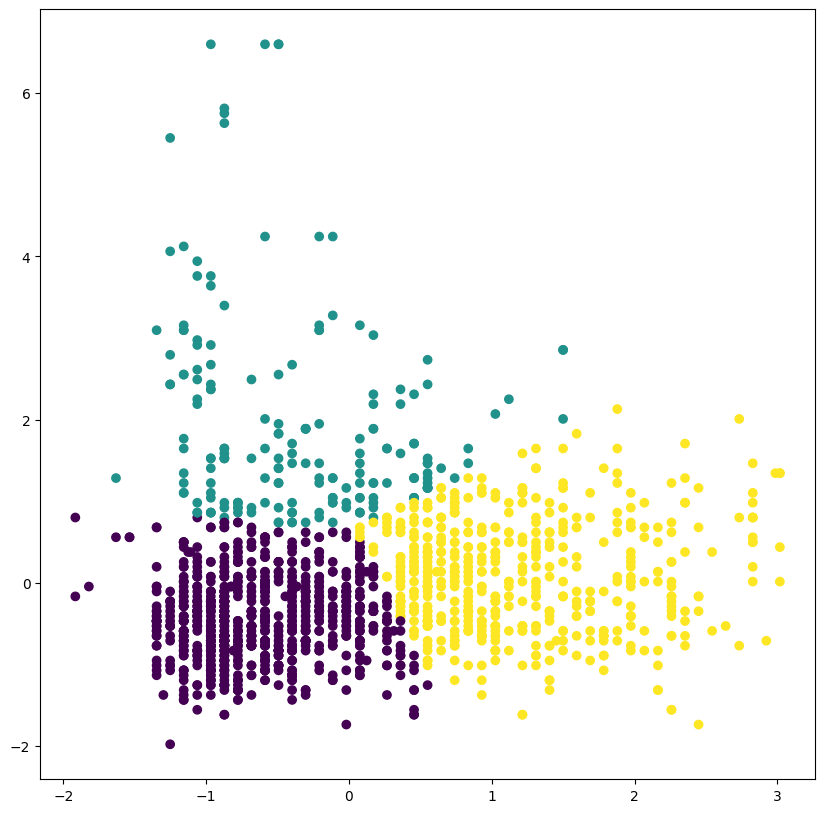

In [49]:
ideal_fit = KMeans(n_clusters=3, random_state=10)
ideal_fit.fit(wine_std)
plt.figure(figsize=(10,10))
plt.scatter(wine_std['alcohol'], wine_std['sulphates'], c=ideal_fit.labels_.astype(float))
#sns.scatterplot(x = wine_std['alcohol'], y=wine_std['sulphates'],hue = ideal_fit.labels_)

In [50]:
silhouette_score(wine_std, ideal_fit.labels_)

0.464285342576862

In [51]:
ideal_fit.cluster_centers_

array([[-0.44733132, -0.62234301],
       [ 1.91653074, -0.34083068],
       [ 0.08165993,  1.18718709]])

In [52]:
ss.inverse_transform(ideal_fit.cluster_centers_)

array([[ 0.58356502,  9.76352765],
       [ 0.97478495, 10.06021505],
       [ 0.67111324, 11.67060141]])

From silhoutte's score above we decided value of n_clusters as 3

We can decide number of cluster using SSW as well as mentioned in the theoretical discussion. SSW is named inertia_ as kmeans function's attribute.

In [53]:
kmeans.inertia_

383.1212420774709

Let look at intertia/SSW values for many Ks, see if our conclusions match with results obtained from silhoutte score.

In [54]:
ks=np.linspace(2,15,14)

In [55]:
ks

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15.])

In [57]:
ssw=[]
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std[['sulphates','alcohol']])
    ssw.append(kmeans.inertia_)
#plt.plot(ks, ssw)

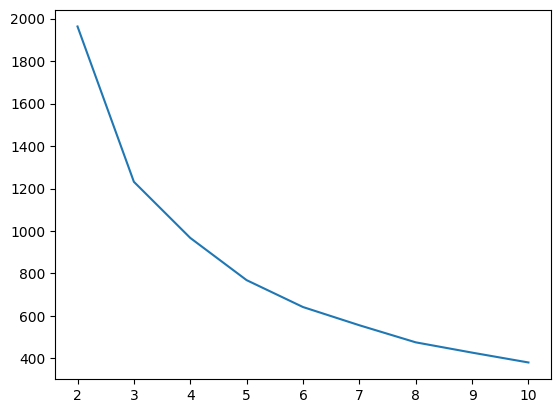

In [58]:
plt.plot(range_n_clusters,ssw)

You can see here the clear elbow point at k=3.

We can try hierarchical clustering as well,it gives most efficient clusters but at much more computational cost. Lets see if results from it are very different from K-means.

In [59]:
from sklearn.cluster import AgglomerativeClustering

In [60]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)


NameError: name 'X' is not defined

We have agreement on number of clusters. Lets see how the end results differ

In [61]:
s = 3
hclust = AgglomerativeClustering(n_clusters=s, affinity='euclidean',linkage='ward')
hclust.fit(wine_std)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [111]:
labels = hclust.fit_predict(X)
wine_std["cluster"]=labels

ValueError: Length of values (100) does not match length of index (1599)

In [113]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Assuming you have already standardized the wine data as 'wine_std'

# Perform hierarchical clustering
hclust = AgglomerativeClustering(n_clusters=3)
labels = hclust.fit_predict(wine_std)

# Create a new column in the DataFrame to store the cluster labels
wine_std['cluster'] = labels

# Print the updated DataFrame
print(wine_std)


      sulphates   alcohol  cluster
0     -0.589718 -0.967277        0
1      0.135356 -0.587736        0
2     -0.045912 -0.587736        0
3     -0.468872 -0.587736        0
4     -0.589718 -0.967277        0
...         ...       ...      ...
1594  -0.468872  0.076460        0
1595   0.618739  0.740656        1
1596   0.558316  0.550886        1
1597   0.316625 -0.208196        0
1598   0.014511  0.550886        0

[1599 rows x 3 columns]


In [114]:
for i in range(s):
    # select only data observations with cluster label == i
    hc = wine_std[wine_std["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(hc[:,0],hc[:,1],'o')

plt.show()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

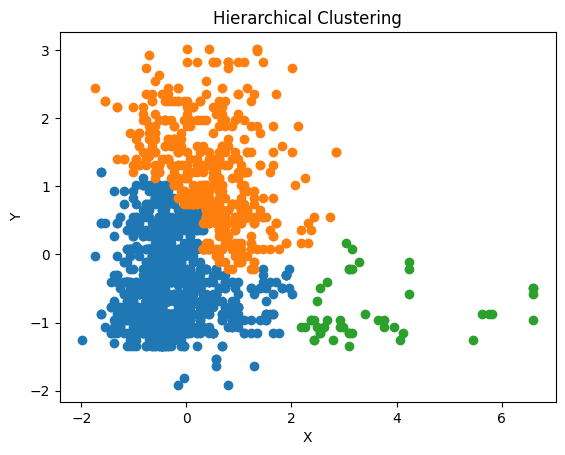

In [115]:
import matplotlib.pyplot as plt

# Assuming you have already performed hierarchical clustering and assigned cluster labels to the DataFrame as 'cluster'

s = len(wine_std['cluster'].unique())

for i in range(s):
    # select only data observations with cluster label == i
    hc = wine_std[wine_std["cluster"] == i].values
    # plot the data observations
    plt.plot(hc[:, 0], hc[:, 1], 'o')

# Add any additional plotting configuration
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hierarchical Clustering')
plt.show()


We can see that kmeans did an excellent job and we did not really need to get into hierarchical clustering to get the best results.

Next we look density based clustering algorithm dbscan. We will take a toy data to bring out clear difference between k-means and dbscan. This example demonstrate how k-means can no capture non-spherical groups in the data. We will be using make_moons function to make data which has two moon shaped very apparent groups. Lets see.

In [64]:
from sklearn.datasets import make_moons
import pandas as pd
import seaborn as sns
mydata = make_moons(n_samples = 2000,noise=0.05)
print(mydata[0].shape)
mydata=pd.DataFrame(mydata[0],columns=["X","Y"])
mydata.head()

(2000, 2)


,X,Y
0,0.119101,0.170694
1,0.550712,0.843854
2,-0.828534,0.624469
3,0.990142,-0.572429
4,0.130874,0.119287


In [64]:
from sklearn.datasets import make_moons
import pandas as pd
import seaborn as sns
mydata = make_moons(n_samples = 2000,noise=0.05)
print(mydata[0].shape)
mydata=pd.DataFrame(mydata[0],columns=["X","Y"])
mydata.head()

(2000, 2)


,X,Y
0,0.119101,0.170694
1,0.550712,0.843854
2,-0.828534,0.624469
3,0.990142,-0.572429
4,0.130874,0.119287


<Axes: xlabel='X', ylabel='Y'>

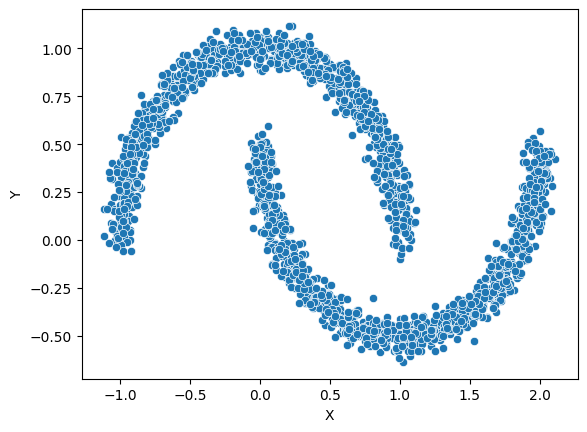

In [68]:
sns.scatterplot(data=mydata, x='X', y='Y')


We can ask k-means to make as many clusters and it will oblige as opposed to dbscan which finds on its own how many natural clusters are there in the data

In [116]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_
#ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

<Axes: xlabel='X', ylabel='Y'>

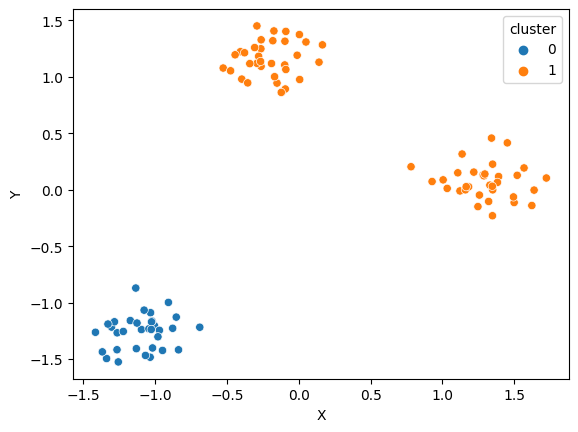

In [117]:
sns.scatterplot(x='X', y='Y', data=mydata, hue='cluster')


As you can see , these are not the clusters that you expected . Lets ask k-mean to make 5 clusters and see what it does

In [118]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_
#ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

You can force k-means to make as many groups in the data as you want, it wont bother about how many natural groups there are in the data. lets see how dbscan treats this.

In [119]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [120]:
del mydata['cluster']

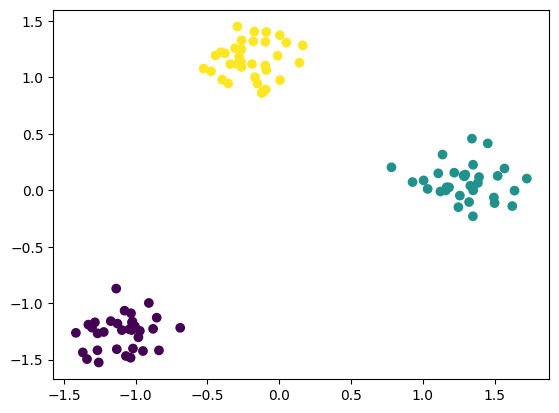

In [121]:
db = DBSCAN(eps=0.27, min_samples=6, metric='euclidean')
db.fit(mydata)
#mydata['cluster'] = db.labels_
plt.scatter(mydata['X'], mydata['Y'] , c=db.labels_.astype(float))

In [122]:
silhouette_score(mydata,db.labels_)

0.8492776082622019

Lets try increasing eps and see what effects it has . 

In [123]:
if 'cluster' in mydata:
    del mydata['cluster']


In [124]:
print(mydata.columns)


Index(['X', 'Y'], dtype='object')


In [125]:
if 'cluster' in mydata.columns:
    sns.scatterplot(x=mydata['X'], y=mydata['Y'], hue=mydata['cluster'])
else:
    print("The 'cluster' column does not exist in mydata.")


The 'cluster' column does not exist in mydata.


In [126]:
print(mydata.columns)

Index(['X', 'Y'], dtype='object')


<Axes: xlabel='X', ylabel='Y'>

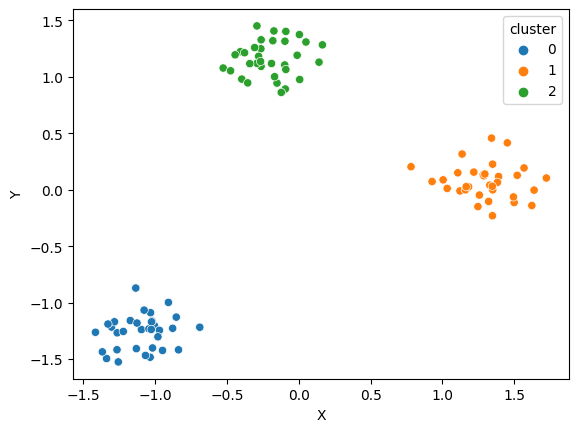

In [138]:
mydata['cluster'] = pd.Categorical(mydata['cluster'])
sns.scatterplot(x='X', y='Y', data=mydata, hue='cluster')


In [128]:
print(mydata.columns)

Index(['X', 'Y'], dtype='object')


Index(['X', 'Y', 'cluster'], dtype='object')


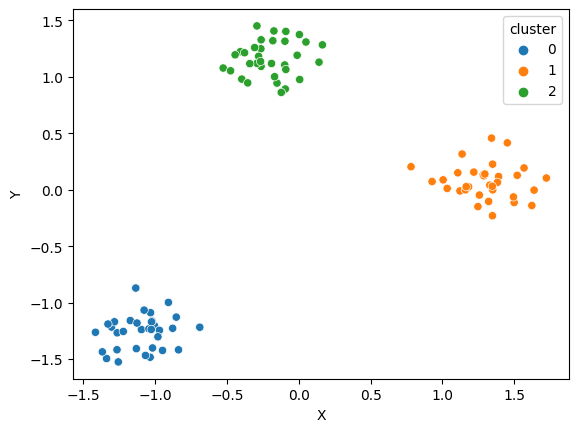

In [137]:
mydata['cluster'] = pd.Categorical(mydata['cluster'])
sns.scatterplot(x='X', y='Y', data=mydata, hue='cluster')
print(mydata.columns)

As you can see increasing neighborhood size results in all points becoming part of same cluster, which is the intended effect.

Now lets see an example where , dbscan doesnt blindly club all the points into clusters, but leave points which are not supposed to be in any clusters. This also demonstrate how k-means is different from dbscan.

<Axes: xlabel='X', ylabel='Y'>

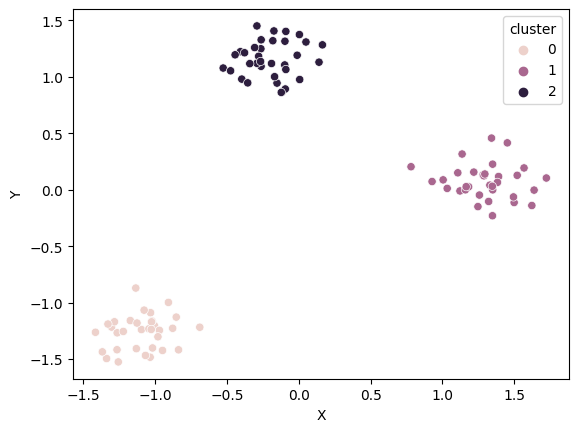

In [131]:
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns

# Generate sample data
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Standardize the features
X = StandardScaler().fit_transform(X)

# Create a DataFrame
mydata = pd.DataFrame(X, columns=['X', 'Y'])

# Perform DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=10, metric='euclidean').fit(X)
mydata['cluster'] = db.labels_

# Plot the scatter plot with clusters
sns.scatterplot(x='X', y='Y', data=mydata, hue='cluster')


In [134]:
df=pd.DataFrame(X,columns=['x1','x2'])
df['labels']=labels

In [133]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate sample data
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Perform DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=10, metric='euclidean').fit(X)
labels = db.labels_

# Create a DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2'])

# Check if the lengths of labels and DataFrame are the same
if len(labels) == len(df):
    df['labels'] = labels
else:
    print("Error: Length mismatch between labels and DataFrame")

# Print the DataFrame
print(df)


          x1        x2  labels
0  -7.726421 -8.394957      -1
1   5.453396  0.742305      -1
2  -2.978672  9.556846      -1
3   6.042673  0.571319      -1
4  -6.521840 -6.319325      -1
..       ...       ...     ...
95 -3.186120  9.625962      -1
96 -1.478198  9.945566      -1
97  4.478593  2.377221      -1
98 -5.796576 -5.826308      -1
99 -3.348415  8.705074      -1

[100 rows x 3 columns]


You can see how dbscan has found outliers. You can play around with the values of eps and min_samples to see how that changes outlier detection and number of clusters detected by dbscan.
